# Importing Libraries

In [1]:
import os
from os import makedirs
from os.path import join, exists
from datetime import date, timedelta
import glob
import json
import requests
import string

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
import re

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

https://gist.github.com/dannguyen/c9cb220093ee4c12b840

# GuardianAPI

In [5]:
ARTICLES_DIR = join('datafolder', 'articles')
makedirs(ARTICLES_DIR, exist_ok=True)

MY_API_KEY = "b8c7855c-e07e-4c00-b2c5-43baea55dfac"
API_ENDPOINT = 'http://content.guardianapis.com/search'
my_params = {
    'from-date': "",
    'to-date': "",
    'order-by': "newest",
    'show-fields': 'all',
    'page-size': 200,
    'api-key': MY_API_KEY
}


# day iteration from here:
# http://stackoverflow.com/questions/7274267/print-all-day-dates-between-two-dates
start_date = date(2021, 1, 1)
end_date = date(2021,5, 1)
dayrange = range((end_date - start_date).days + 1)
for daycount in dayrange:
    dt = start_date + timedelta(days=daycount)
    datestr = dt.strftime('%Y-%m-%d')
    fname = join(ARTICLES_DIR, datestr + '.json')
    if not exists(fname):
        # then let's download it
        print("Downloading", datestr)
        all_results = []
        my_params['from-date'] = datestr
        my_params['to-date'] = datestr
        current_page = 1
        total_pages = 1
        while current_page <= total_pages:
            print("...page", current_page)
            my_params['page'] = current_page
            resp = requests.get(API_ENDPOINT, my_params)
            data = resp.json()
            all_results.extend(data['response']['results'])
            # if there is more than one page
            current_page += 1
            total_pages = data['response']['pages']

        with open(fname, 'w') as f:
            print("Writing to", fname)

            # re-serialize it for pretty indentation
            f.write(json.dumps(all_results, indent=2))

...page 1
Writing to datafolder\articles1\2021-01-04.json
...page 1
Writing to datafolder\articles1\2021-01-05.json
...page 1
Writing to datafolder\articles1\2021-01-06.json
...page 1
...page 2
Writing to datafolder\articles1\2021-01-07.json
...page 1
...page 2
Writing to datafolder\articles1\2021-01-08.json
...page 1
Writing to datafolder\articles1\2021-01-09.json
...page 1
Writing to datafolder\articles1\2021-01-10.json


In [2]:
data=pd.read_json (r'C:\Users\asus\NLP project\datafolder\articles\2021-01-10.json')

In [3]:
data.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,isHosted,pillarId,pillarName
0,world/live/2021/jan/10/coronavirus-live-news-o...,liveblog,world,World news,2021-01-10T23:56:33Z,"UK reports nearly 55,000 new infections – as i...",https://www.theguardian.com/world/live/2021/ja...,https://content.guardianapis.com/world/live/20...,"{'headline': 'UK reports nearly 55,000 new inf...",False,pillar/news,News
1,us-news/2021/jan/10/donald-trump-capitol-attac...,article,us-news,US news,2021-01-10T23:02:10Z,Democrats ponder delaying Trump impeachment tr...,https://www.theguardian.com/us-news/2021/jan/1...,https://content.guardianapis.com/us-news/2021/...,{'headline': 'Democrats ponder delaying Trump ...,False,pillar/news,News
2,football/2021/jan/10/newport-brighton-fa-cup-m...,article,football,Football,2021-01-10T22:50:21Z,Jason Steele's acrobatics take Brighton past N...,https://www.theguardian.com/football/2021/jan/...,https://content.guardianapis.com/football/2021...,{'headline': 'Jason Steele's acrobatics take B...,False,pillar/sport,Sport
3,football/2021/jan/10/paul-pogba-victor-lindelo...,article,football,Football,2021-01-10T22:30:02Z,"Pogba, Lindelöf and Shaw in fitness race for M...",https://www.theguardian.com/football/2021/jan/...,https://content.guardianapis.com/football/2021...,"{'headline': 'Pogba, Lindelöf and Shaw in fitn...",False,pillar/sport,Sport
4,football/2021/jan/10/respect-jose-mourinho-mar...,article,football,Football,2021-01-10T21:18:03Z,'I have so much respect for Mourinho': Marine'...,https://www.theguardian.com/football/2021/jan/...,https://content.guardianapis.com/football/2021...,{'headline': ''I have so much respect for Mour...,False,pillar/sport,Sport


In [4]:
print(f' PillarName column has {len(data.pillarName.unique())} unique values: {data.pillarName.unique()}')

 PillarName column has 5 unique values: ['Sport' 'News' 'Arts' 'Lifestyle' 'Opinion']


In [5]:
data['pillarName'].value_counts()

News         81
Arts         27
Sport        27
Lifestyle    18
Opinion      11
Name: pillarName, dtype: int64

In [6]:
data.isnull().sum()

id                    0
type                  0
sectionId             0
sectionName           0
webPublicationDate    0
webTitle              0
webUrl                0
apiUrl                0
fields                0
isHosted              0
pillarId              0
pillarName            0
dtype: int64

In [7]:
data.iloc[0]

id                    football/live/2021/jan/01/manchester-united-v-...
type                                                           liveblog
sectionId                                                      football
sectionName                                                    Football
webPublicationDate                                 2021-01-01T23:30:38Z
webTitle              Manchester United v Aston Villa: Premier Leagu...
webUrl                https://www.theguardian.com/football/live/2021...
apiUrl                https://content.guardianapis.com/football/live...
fields                {'headline': 'Manchester United v Aston Villa:...
isHosted                                                          False
pillarId                                                   pillar/sport
pillarName                                                        Sport
Name: 0, dtype: object

# Concatenate Articles

In [8]:
path = r'C:\Users\asus\NLP project\datafolder\articles1'                   
all_files = glob.glob(os.path.join(path, "*.json"))    
df_from_each_file = (pd.read_json(f) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)


In [9]:
concatenated_df

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,isHosted,pillarId,pillarName
0,football/live/2021/jan/01/manchester-united-v-...,liveblog,football,Football,2021-01-01T23:30:38Z,Manchester United v Aston Villa: Premier Leagu...,https://www.theguardian.com/football/live/2021...,https://content.guardianapis.com/football/live...,{'headline': 'Manchester United v Aston Villa:...,False,pillar/sport,Sport
1,football/2021/jan/01/manchester-united-must-im...,article,football,Football,2021-01-01T23:16:24Z,Manchester United must improve to challenge fo...,https://www.theguardian.com/football/2021/jan/...,https://content.guardianapis.com/football/2021...,{'headline': 'Manchester United must improve t...,False,pillar/sport,Sport
2,football/2021/jan/01/chris-basham-sheffield-un...,article,football,Football,2021-01-01T22:30:21Z,Chris Basham says record low fear can spur She...,https://www.theguardian.com/football/2021/jan/...,https://content.guardianapis.com/football/2021...,{'headline': 'Chris Basham says record low fea...,False,pillar/sport,Sport
3,business/2021/jan/01/covid-measures-labour-uni...,article,business,Business,2021-01-01T22:30:21Z,Extend Covid measures or households face 'clif...,https://www.theguardian.com/business/2021/jan/...,https://content.guardianapis.com/business/2021...,{'headline': 'Extend Covid measures or househo...,False,pillar/news,News
4,football/2021/jan/01/bruno-fernandes-fires-man...,article,football,Football,2021-01-01T22:05:08Z,Manchester United go joint top after Fernandes...,https://www.theguardian.com/football/2021/jan/...,https://content.guardianapis.com/football/2021...,{'headline': 'Manchester United go joint top a...,False,pillar/sport,Sport
...,...,...,...,...,...,...,...,...,...,...,...,...
1792,crosswords/2021/jan/10/azed-crossword-2535,article,crosswords,Crosswords,2021-01-10T00:01:35Z,"Azed crossword 2,535",https://www.theguardian.com/crosswords/2021/ja...,https://content.guardianapis.com/crosswords/20...,"{'headline': 'Azed crossword 2,535', 'trailTex...",False,pillar/lifestyle,Lifestyle
1793,lifeandstyle/2021/jan/10/observer-killer-sudoku,article,lifeandstyle,Life and style,2021-01-10T00:01:35Z,Observer killer sudoku,https://www.theguardian.com/lifeandstyle/2021/...,https://content.guardianapis.com/lifeandstyle/...,"{'headline': 'Observer killer sudoku', 'trailT...",False,pillar/lifestyle,Lifestyle
1794,lifeandstyle/2021/jan/10/observer-sudoku,article,lifeandstyle,Life and style,2021-01-10T00:01:35Z,Observer sudoku,https://www.theguardian.com/lifeandstyle/2021/...,https://content.guardianapis.com/lifeandstyle/...,"{'headline': 'Observer sudoku', 'trailText': '...",False,pillar/lifestyle,Lifestyle
1795,crosswords/everyman/3874,crossword,crosswords,Crosswords,2021-01-10T00:00:35Z,"Everyman crossword No 3,874",https://www.theguardian.com/crosswords/everyma...,https://content.guardianapis.com/crosswords/ev...,"{'headline': 'Everyman crossword No 3,874', 't...",False,pillar/lifestyle,Lifestyle


In [10]:
print(f' PillarName column has {len(concatenated_df.pillarName.unique())} unique values: {concatenated_df.pillarName.unique()}')

 PillarName column has 6 unique values: ['Sport' 'News' 'Arts' 'Lifestyle' 'Opinion' nan]


In [11]:
print(f' SectionName column has {len(concatenated_df.sectionName.unique())} unique values: {concatenated_df.sectionName.unique()}')

 PillarName column has 78 unique values: ['Football' 'Business' 'Television & radio' 'Sport' 'US news' 'World news'
 'Australia news' 'Life and style' 'Opinion' 'Environment' 'Inequality'
 'Music' 'Politics' 'Education' 'UK news' 'Books' 'Art and design'
 'Society' 'Film' 'Food' 'Fashion' 'Crosswords' 'Stage'
 'Global development' 'Travel' 'Culture' 'Media' 'Global' 'Membership'
 'Money' 'News' 'Technology' 'Science' 'From the Observer' 'Info' 'Games'
 'Law' 'Animals farmed' 'From the Guardian' 'All together'
 'GNM press office' 'Dairy Australia: Green solutions'
 'Guardian US press office' 'BritBox: Best of Brit TV'
 'Bank Australia: Collective good' 'American Express: Business class'
 "Let's live clean" 'Guardian Masterclasses' 'Weather'
 '100 teachers, 100 passions, 100 ways to shape lives'
 'Educating tomorrow'
 'The University of Melbourne: Graduating Performances'
 'Victoria University: Inspiring futures' 'Getting back on track'
 'Disney+ WandaVision' 'Re-engineering education' '

In [11]:
concatenated_df.pillarName.value_counts()

News         926
Sport        267
Arts         261
Lifestyle    193
Opinion      146
Name: pillarName, dtype: int64

In [13]:
concatenated_df.sectionName.value_counts()

World news                         2501
Football                           1523
Opinion                            1369
Sport                              1302
US news                            1293
                                   ... 
Felix Mobile: The only one            1
My Northern Ireland                   1
Bank Australia: Collective good       1
Safeguarding our planet               1
Focus                                 1
Name: sectionName, Length: 78, dtype: int64

In [12]:
concatenated_df.isnull().sum()

id                    0
type                  0
sectionId             0
sectionName           0
webPublicationDate    0
webTitle              0
webUrl                0
apiUrl                0
fields                0
isHosted              0
pillarId              4
pillarName            4
dtype: int64

In [13]:
concatenated_df.dropna(axis=0, inplace=True)
concatenated_df.tail()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,isHosted,pillarId,pillarName
1792,crosswords/2021/jan/10/azed-crossword-2535,article,crosswords,Crosswords,2021-01-10T00:01:35Z,"Azed crossword 2,535",https://www.theguardian.com/crosswords/2021/ja...,https://content.guardianapis.com/crosswords/20...,"{'headline': 'Azed crossword 2,535', 'trailTex...",False,pillar/lifestyle,Lifestyle
1793,lifeandstyle/2021/jan/10/observer-killer-sudoku,article,lifeandstyle,Life and style,2021-01-10T00:01:35Z,Observer killer sudoku,https://www.theguardian.com/lifeandstyle/2021/...,https://content.guardianapis.com/lifeandstyle/...,"{'headline': 'Observer killer sudoku', 'trailT...",False,pillar/lifestyle,Lifestyle
1794,lifeandstyle/2021/jan/10/observer-sudoku,article,lifeandstyle,Life and style,2021-01-10T00:01:35Z,Observer sudoku,https://www.theguardian.com/lifeandstyle/2021/...,https://content.guardianapis.com/lifeandstyle/...,"{'headline': 'Observer sudoku', 'trailText': '...",False,pillar/lifestyle,Lifestyle
1795,crosswords/everyman/3874,crossword,crosswords,Crosswords,2021-01-10T00:00:35Z,"Everyman crossword No 3,874",https://www.theguardian.com/crosswords/everyma...,https://content.guardianapis.com/crosswords/ev...,"{'headline': 'Everyman crossword No 3,874', 't...",False,pillar/lifestyle,Lifestyle
1796,crosswords/speedy/1319,crossword,crosswords,Crosswords,2021-01-10T00:00:35Z,"Speedy crossword No 1,319",https://www.theguardian.com/crosswords/speedy/...,https://content.guardianapis.com/crosswords/sp...,"{'headline': 'Speedy crossword No 1,319', 'tra...",False,pillar/lifestyle,Lifestyle


<AxesSubplot:ylabel='pillarName'>

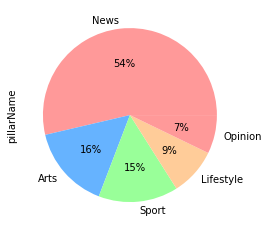

In [16]:
#plt.rcParams["figure.figsize"] = (10,10)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
concatenated_df.pillarName.value_counts().plot.pie(autopct='%1.0f%%', colors=colors)

In [17]:
concatenated_df.isnull().sum().sum()

0

In [18]:
print (concatenated_df['fields'][0]['bodyText'])

“First half we were miles off it,” he tells Sky Sports. “First 15 minutes felt like a testimonial. Then they injected some pace into it and deservedly went ahead. “I asked for more at half-time and we deserved to get back in the game. Our goalkeeper has had to make some good saves but they were all from outside the box. On Manchester United’s penalty: “I thought it was a penalty at the time, but I looked at it after the game and saw he tripped himself. I don’t see why Michael Oliver couldn’t have looked at it. That’s what VAR is for isn’t it? He’s tripped himself up. There’s margins in football. I’ve seen it again, and I don’t think it’s a penalty. “We know we’re on a good journey at the moment. We believe we’ve got five key arrivals to go with the players who are Premier League ready now. “This is only our second season in the division, but competing here and against Liverpool and Arsenal shows our journey is going well so far.” Premier League: Jamie Jackson was at Old Trafford to see

# Get BodyText from Fields

In [14]:
# Create a list to store the data
bodyText= []

for item in concatenated_df['fields']:
    bodyText.append(item.get('bodyText'))
    
    
concatenated_df['bodyText'] = bodyText

In [20]:
concatenated_df.iloc[0]

id                    football/live/2021/jan/01/manchester-united-v-...
type                                                           liveblog
sectionId                                                      football
sectionName                                                    Football
webPublicationDate                                 2021-01-01T23:30:38Z
webTitle              Manchester United v Aston Villa: Premier Leagu...
webUrl                https://www.theguardian.com/football/live/2021...
apiUrl                https://content.guardianapis.com/football/live...
fields                {'headline': 'Manchester United v Aston Villa:...
isHosted                                                          False
pillarId                                                   pillar/sport
pillarName                                                        Sport
bodyText              “First half we were miles off it,” he tells Sk...
Name: 0, dtype: object

In [21]:
concatenated_df.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,isHosted,pillarId,pillarName,bodyText
0,football/live/2021/jan/01/manchester-united-v-...,liveblog,football,Football,2021-01-01T23:30:38Z,Manchester United v Aston Villa: Premier Leagu...,https://www.theguardian.com/football/live/2021...,https://content.guardianapis.com/football/live...,{'headline': 'Manchester United v Aston Villa:...,False,pillar/sport,Sport,"“First half we were miles off it,” he tells Sk..."
1,football/2021/jan/01/manchester-united-must-im...,article,football,Football,2021-01-01T23:16:24Z,Manchester United must improve to challenge fo...,https://www.theguardian.com/football/2021/jan/...,https://content.guardianapis.com/football/2021...,{'headline': 'Manchester United must improve t...,False,pillar/sport,Sport,Ole Gunnar Solskjær praised Manchester United ...
2,business/2021/jan/01/covid-measures-labour-uni...,article,business,Business,2021-01-01T22:30:21Z,Extend Covid measures or households face 'clif...,https://www.theguardian.com/business/2021/jan/...,https://content.guardianapis.com/business/2021...,{'headline': 'Extend Covid measures or househo...,False,pillar/news,News,Many low- and middle-income households will fa...
3,football/2021/jan/01/chris-basham-sheffield-un...,article,football,Football,2021-01-01T22:30:21Z,Chris Basham says record low fear can spur She...,https://www.theguardian.com/football/2021/jan/...,https://content.guardianapis.com/football/2021...,{'headline': 'Chris Basham says record low fea...,False,pillar/sport,Sport,Chris Basham says the fear of being labelled t...
4,football/2021/jan/01/bruno-fernandes-fires-man...,article,football,Football,2021-01-01T22:05:08Z,Manchester United go joint top after Fernandes...,https://www.theguardian.com/football/2021/jan/...,https://content.guardianapis.com/football/2021...,{'headline': 'Manchester United go joint top a...,False,pillar/sport,Sport,Manchester United have moved level with Liverp...


In [22]:
concatenated_df.tail()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,isHosted,pillarId,pillarName,bodyText
19243,australia-news/2021/apr/01/was-it-airborne-bri...,article,australia-news,Australia news,2021-04-01T01:33:19Z,Was it airborne? Queensland's Covid outbreak a...,https://www.theguardian.com/australia-news/202...,https://content.guardianapis.com/australia-new...,{'headline': 'Was it airborne? Queensland's Co...,False,pillar/news,News,The mystery coronavirus infections of healthca...
19245,australia-news/2021/apr/01/calls-for-inquiry-a...,article,australia-news,Australia news,2021-04-01T00:40:14Z,Calls for inquiry after Sydney police arrest I...,https://www.theguardian.com/australia-news/202...,https://content.guardianapis.com/australia-new...,{'headline': 'Calls for inquiry after Sydney p...,False,pillar/news,News,There are calls for an independent investigati...
19246,australia-news/2021/apr/01/easter-is-good-to-g...,article,australia-news,Australia news,2021-04-01T00:11:56Z,'Easter is good to go': Brisbane lockdown to l...,https://www.theguardian.com/australia-news/202...,https://content.guardianapis.com/australia-new...,{'headline': ''Easter is good to go': Brisbane...,False,pillar/news,News,"The Queensland premier, Annastacia Palaszcuzk,..."
19247,world/2021/apr/01/siouxsie-wiles-named-new-zea...,article,world,World news,2021-04-01T00:06:46Z,Siouxsie Wiles named New Zealander of the Year,https://www.theguardian.com/world/2021/apr/01/...,https://content.guardianapis.com/world/2021/ap...,{'headline': 'Siouxsie Wiles named New Zealand...,False,pillar/news,News,Scientist Siouxsie Wiles has been named New Ze...
19248,us-news/live/2021/mar/31/joe-biden-infrastruct...,liveblog,us-news,US news,2021-04-01T00:02:15Z,Biden praises infrastructure plan as a 'once-i...,https://www.theguardian.com/us-news/live/2021/...,https://content.guardianapis.com/us-news/live/...,{'headline': 'Biden praises infrastructure pla...,False,pillar/news,News,Joe Biden outlined his infrastructure plan in ...


In [23]:
concatenated_df.iloc[0]['bodyText']

'“First half we were miles off it,” he tells Sky Sports. “First 15 minutes felt like a testimonial. Then they injected some pace into it and deservedly went ahead. “I asked for more at half-time and we deserved to get back in the game. Our goalkeeper has had to make some good saves but they were all from outside the box. On Manchester United’s penalty: “I thought it was a penalty at the time, but I looked at it after the game and saw he tripped himself. I don’t see why Michael Oliver couldn’t have looked at it. That’s what VAR is for isn’t it? He’s tripped himself up. There’s margins in football. I’ve seen it again, and I don’t think it’s a penalty. “We know we’re on a good journey at the moment. We believe we’ve got five key arrivals to go with the players who are Premier League ready now. “This is only our second season in the division, but competing here and against Liverpool and Arsenal shows our journey is going well so far.” Premier League: Jamie Jackson was at Old Trafford to se

In [24]:
concatenated_df.iloc[1]['bodyText']

'Ole Gunnar Solskjær praised Manchester United for beating Aston Villa and drawing level with Liverpool on 33 points but insisted his team need to improve if they are to maintain their title challenge. The manager admitted the closing stages of the 2-1 win at Old Trafford was nerve-racking due to his side’s poor game management. “I did not enjoy the last 10 minutes that much because I feel we should have seen the game out in a better way,” said Solskjær. “It seemed like the cup final or the last game of the season. We need to learn how to play out games better.” United are second to the champions on goal difference after 16 matches and may have a chance to take the outright lead when travelling to Liverpool on 17 January. Solskjær said: “I think the league and the season is going to be so tight anyway. “There are going to be strange results. We have to keep improving and since Project Restart started we have been consistent. “Every time you win a game you take it one step further. The 

In [25]:
new_data = concatenated_df[['bodyText', 'sectionName']].copy()
new_data.head()

,bodyText,sectionName
0,"“First half we were miles off it,” he tells Sk...",Football
1,Ole Gunnar Solskjær praised Manchester United ...,Football
2,Many low- and middle-income households will fa...,Business
3,Chris Basham says the fear of being labelled t...,Football
4,Manchester United have moved level with Liverp...,Football


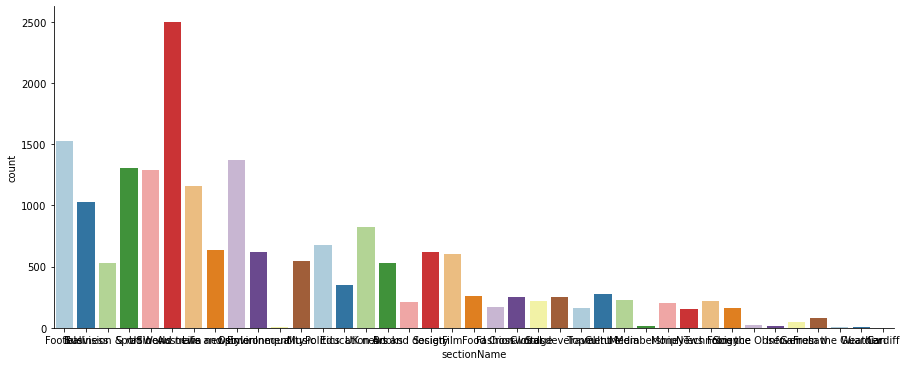

In [26]:
sns.factorplot(x='sectionName', data=new_data , kind='count',aspect=2.5, palette="Paired" )

In [27]:
new_data['sectionName'].value_counts()

World news            2501
Football              1523
Opinion               1369
Sport                 1302
US news               1293
Australia news        1159
Business              1027
UK news                822
Politics               679
Life and style         636
Society                621
Environment            619
Film                   602
Music                  542
Books                  532
Television & radio     526
Education              350
Culture                280
Food                   260
Crosswords             255
Global development     249
Media                  227
Stage                  222
Technology             220
Art and design         213
Money                  202
Fashion                170
Science                165
Travel                 164
News                   155
Law                     78
Games                   46
From the Observer       26
Info                    16
Membership              12
From the Guardian        7
Inequality               6
W

In [28]:
pdata = concatenated_df[['bodyText', 'pillarName']].copy() #News Content
pdata = pdata.rename(columns={'pillarName': 'Category'})
pdata.head()

,bodyText,Category
0,"“First half we were miles off it,” he tells Sk...",Sport
1,Ole Gunnar Solskjær praised Manchester United ...,Sport
2,Many low- and middle-income households will fa...,News
3,Chris Basham says the fear of being labelled t...,Sport
4,Manchester United have moved level with Liverp...,Sport


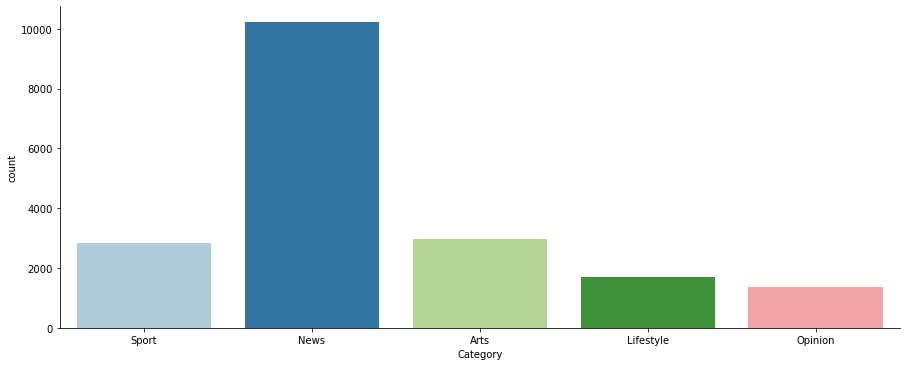

In [29]:
sns.factorplot(x='Category', data=pdata , kind='count',aspect=2.5, palette="Paired" )

In [30]:
pdata['News_length'] = pdata['bodyText'].str.len()

# Get rid of outliers

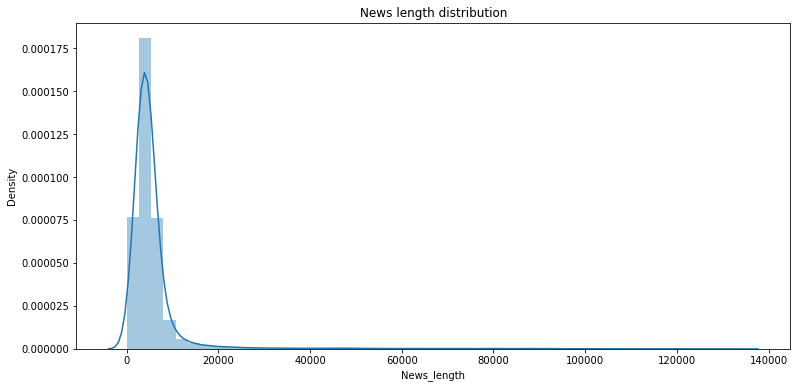

In [31]:
plt.figure(figsize=(12.8,6))
sns.distplot(pdata['News_length']).set_title('News length distribution');

In [32]:
pdata['News_length'].describe()

count     19082.000000
mean       5969.828163
std        9482.726756
min           0.000000
25%        2942.250000
50%        4288.000000
75%        5795.750000
max      133707.000000
Name: News_length, dtype: float64

In [33]:
quantile_95 = pdata['News_length'].quantile(0.95)
df_95 = pdata[pdata['News_length'] < quantile_95]

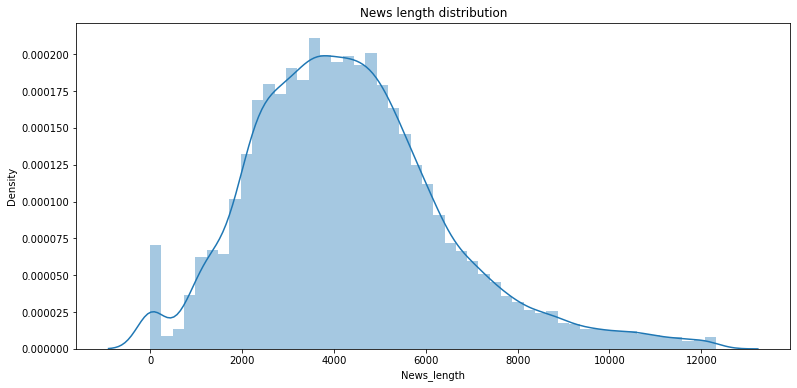

In [34]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['News_length']).set_title('News length distribution');

In [35]:
df_95['News_length'].describe()

count    18127.000000
mean      4360.664754
std       2144.905604
min          0.000000
25%       2872.000000
50%       4159.000000
75%       5509.500000
max      12324.000000
Name: News_length, dtype: float64

# Preprocessing & Cleaning

In [36]:
df_95['Clear'] = df_95['bodyText'].str.replace('-', ' ')
df_95['Clear'] = df_95['Clear'].str.replace('"', '')

In [37]:
df_95.head()

,bodyText,Category,News_length,Clear
1,Ole Gunnar Solskjær praised Manchester United ...,Sport,2237,Ole Gunnar Solskjær praised Manchester United ...
2,Many low- and middle-income households will fa...,News,3771,Many low and middle income households will fa...
3,Chris Basham says the fear of being labelled t...,Sport,2220,Chris Basham says the fear of being labelled t...
4,Manchester United have moved level with Liverp...,Sport,4647,Manchester United have moved level with Liverp...
5,"In American Heiress, his brilliant 2016 book a...",Arts,4864,"In American Heiress, his brilliant 2016 book a..."


In [38]:
#to avoid any case-sensitive process
df_95['Clear'] = df_95['Clear'].str.lower()

In [39]:

df_95['Clear'] = df_95['Clear'].str.replace("'s", "")
df_95['Clear'] = df_95['Clear'].str.replace("’s", "")
df_95['Clear'] = df_95['Clear'].str.replace("’t", "")
df_95['Clear'] = df_95['Clear'].str.replace('""', '')
df_95['Clear'] = df_95['Clear'].str.replace(r'\d+',"") #replace all digits
df_95['Clear'] = df_95['Clear'].str.replace(r"http\S+", "")
df_95['Clear'] = df_95['Clear'].str.replace("  ", " ")
df_95['Clear'] = df_95['Clear'].str.replace(r'[ ]{2,}',"")


df_95['Clear'] = df_95['Clear'].str.replace("’", "'")

In [40]:
punctuations = string.punctuation 
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [41]:
punctuation_signs = list("?:!.,;•%!#$%&'()*+,./:;<=>?@[\]^_`{|}~£“”–")
df_95['Clear'] = df_95['Clear']

for punct_sign in punctuation_signs:
    df_95['Clear'] = df_95['Clear'].str.replace(punct_sign, '')

In [42]:
df_95['Clear'] = df_95['Clear'].str.replace("  ", " ")
df_95['Clear'] = df_95['Clear'].str.replace(r'[ ]{2,}',"")

In [43]:
df_95.iloc[1]['Clear']

'many low and middle income households will face financial hardship unless ministers maintain support for those who have lost their jobs or experienced steep cuts in income during the second wave of covid labour has said the shadow chancellor anneliese dodds said in a new year message to rishi sunak that the chancellor must extend a range of covid rescue measures due to run out over the next three months to protect struggling households from financial ruin a mortgage holiday scheme and a ban on home repossessions should be extended beyond the january cutoff date said dodds while a a week boost to universal credit due to run out on april should remain in place until the crisis is over analysis by the bank of england in november found that of households experienced a drop in income during the first wave of the pandemic rising to among self employed people dodds said whether employed self employed relying on social security or a combination of all three britain beleaguered households face

In [44]:
df_95.iloc[1]['bodyText']

'Many low- and middle-income households will face financial hardship unless ministers maintain support for those who have lost their jobs or experienced steep cuts in income during the second wave of Covid-19, Labour has said. The shadow chancellor, Anneliese Dodds, said in a new year message to Rishi Sunak that the chancellor must extend a range of Covid-19 rescue measures due to run out over the next three months “to protect struggling households from financial ruin”. A mortgage holiday scheme and a ban on home repossessions should be extended beyond the 31 January cutoff date, said Dodds, while a £20-a-week boost to universal credit, due to run out on 6 April, should remain in place until the crisis is over. Analysis by the Bank of England in November found that 28% of households experienced a drop in income during the first wave of the pandemic, rising to 66% among self-employed people. Dodds said: “Whether employed, self-employed, relying on social security or a combination of all

In [45]:
# Downloading punkt and wordnet from NLTK
nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')

------------------------------------------------------------


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Lemmatization

In [46]:
from nltk.stem import WordNetLemmatizer

related forms of a word to a common base form

In [47]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df_95['text_lemmatized'] = df_95['Clear'].apply(lemmatize_text)

In [48]:
df_95.head()

,bodyText,Category,News_length,Clear,text_lemmatized
1,Ole Gunnar Solskjær praised Manchester United ...,Sport,2237,ole gunnar solskjær praised manchester united ...,"[ole, gunnar, solskjær, praised, manchester, u..."
2,Many low- and middle-income households will fa...,News,3771,many low and middle income households will fac...,"[many, low, and, middle, income, household, wi..."
3,Chris Basham says the fear of being labelled t...,Sport,2220,chris basham says the fear of being labelled t...,"[chris, basham, say, the, fear, of, being, lab..."
4,Manchester United have moved level with Liverp...,Sport,4647,manchester united have moved level with liverp...,"[manchester, united, have, moved, level, with,..."
5,"In American Heiress, his brilliant 2016 book a...",Arts,4864,in american heiress his brilliant book about t...,"[in, american, heiress, his, brilliant, book, ..."


# Stopwords

In [49]:
nltk.download("stopwords")
stopword = set(stopwords.words("english"))
print(stopword)

{'needn', "mightn't", 'her', 'too', 'all', 'than', 'this', 'doing', "didn't", 'is', 'under', "weren't", 'his', 'ma', 'because', 'which', 'if', "it's", 'at', 'am', 'such', 'yours', "don't", 'wasn', 'm', 'will', 'ain', "isn't", 'was', "wasn't", "hasn't", 'himself', 'or', "couldn't", "doesn't", "mustn't", 'other', 'while', 'theirs', 'again', 'over', "needn't", 'with', 'during', 'does', 'only', 'for', "that'll", 'how', 'had', 'they', 'having', 'them', 'here', 'mustn', 'an', 'hasn', 'd', 'has', 'been', 'you', 'he', "she's", 'its', 'just', "you're", 'who', 'off', 'but', "shouldn't", 'aren', 'hadn', 'we', 'in', 'it', 'few', 'most', 'very', 'hers', 'each', 'won', 'any', 'itself', 'couldn', "you'd", 'further', "you'll", 'whom', 'no', 'to', 'nor', 'now', 'll', 'same', 'after', 'themselves', 'through', 'below', "won't", 'on', 'didn', 'above', 'doesn', 'shan', 'myself', 'their', 've', 'some', 'y', 're', 'ours', 'against', 't', 'mightn', 'and', 'ourselves', 's', 'by', 'as', 'can', "wouldn't", 'unti

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
stopword = stopwords.words("english")

def clean_stop(text):
    return [word for word in text if word not in stopword]

df_95['clean'] = df_95['text_lemmatized'].apply(clean_stop)

In [51]:
df_95.head()

,bodyText,Category,News_length,Clear,text_lemmatized,clean
1,Ole Gunnar Solskjær praised Manchester United ...,Sport,2237,ole gunnar solskjær praised manchester united ...,"[ole, gunnar, solskjær, praised, manchester, u...","[ole, gunnar, solskjær, praised, manchester, u..."
2,Many low- and middle-income households will fa...,News,3771,many low and middle income households will fac...,"[many, low, and, middle, income, household, wi...","[many, low, middle, income, household, face, f..."
3,Chris Basham says the fear of being labelled t...,Sport,2220,chris basham says the fear of being labelled t...,"[chris, basham, say, the, fear, of, being, lab...","[chris, basham, say, fear, labelled, worst, pr..."
4,Manchester United have moved level with Liverp...,Sport,4647,manchester united have moved level with liverp...,"[manchester, united, have, moved, level, with,...","[manchester, united, moved, level, liverpool, ..."
5,"In American Heiress, his brilliant 2016 book a...",Arts,4864,in american heiress his brilliant book about t...,"[in, american, heiress, his, brilliant, book, ...","[american, heiress, brilliant, book, patricia,..."


In [52]:
def listToString(text):
    return ' '.join(map(str,[word for word in text]))

In [53]:
df_95['cleanText'] = df_95['clean'].apply(listToString)

In [54]:
df_95.head()

,bodyText,Category,News_length,Clear,text_lemmatized,clean,cleanText
1,Ole Gunnar Solskjær praised Manchester United ...,Sport,2237,ole gunnar solskjær praised manchester united ...,"[ole, gunnar, solskjær, praised, manchester, u...","[ole, gunnar, solskjær, praised, manchester, u...",ole gunnar solskjær praised manchester united ...
2,Many low- and middle-income households will fa...,News,3771,many low and middle income households will fac...,"[many, low, and, middle, income, household, wi...","[many, low, middle, income, household, face, f...",many low middle income household face financia...
3,Chris Basham says the fear of being labelled t...,Sport,2220,chris basham says the fear of being labelled t...,"[chris, basham, say, the, fear, of, being, lab...","[chris, basham, say, fear, labelled, worst, pr...",chris basham say fear labelled worst premier l...
4,Manchester United have moved level with Liverp...,Sport,4647,manchester united have moved level with liverp...,"[manchester, united, have, moved, level, with,...","[manchester, united, moved, level, liverpool, ...",manchester united moved level liverpool separa...
5,"In American Heiress, his brilliant 2016 book a...",Arts,4864,in american heiress his brilliant book about t...,"[in, american, heiress, his, brilliant, book, ...","[american, heiress, brilliant, book, patricia,...",american heiress brilliant book patricia hears...


In [55]:
data = df_95[['cleanText', 'Category']].copy() #News Content
data = data.rename(columns={'cleanText':'Content'})
data.head()

,Content,Category
1,ole gunnar solskjær praised manchester united ...,Sport
2,many low middle income household face financia...,News
3,chris basham say fear labelled worst premier l...,Sport
4,manchester united moved level liverpool separa...,Sport
5,american heiress brilliant book patricia hears...,Arts


In [56]:
data["Category"].value_counts()

News         9718
Arts         2870
Sport        2535
Lifestyle    1638
Opinion      1366
Name: Category, dtype: int64

# Label Encoding

In [57]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["Category1"] = le.fit_transform(data["Category"].fillna('NaN'))

In [58]:
data.isnull().sum()

Content      0
Category     0
Category1    0
dtype: int64

In [59]:
data

,Content,Category,Category1
1,ole gunnar solskjær praised manchester united ...,Sport,4
2,many low middle income household face financia...,News,2
3,chris basham say fear labelled worst premier l...,Sport,4
4,manchester united moved level liverpool separa...,Sport,4
5,american heiress brilliant book patricia hears...,Arts,0
...,...,...,...
19242,recent petition launched chanel conto calling ...,Opinion,3
19243,mystery coronavirus infection healthcare worke...,News,2
19245,call independent investigation arrest indigeno...,News,2
19246,queensland premier annastacia palaszcuzk ha an...,News,2


# Remove NaN values 

In [60]:
def isBlank (myString):
    if myString and myString.strip():
        return False
    return np.NaN

In [61]:
data['control'] = data['Content'].apply(isBlank)

In [62]:
data['control1'] = data['Category'].apply(isBlank)

In [63]:
data.isnull().sum()

Content        0
Category       0
Category1      0
control      294
control1       0
dtype: int64

In [64]:
data.tail()

,Content,Category,Category1,control,control1
19242,recent petition launched chanel conto calling ...,Opinion,3,False,False
19243,mystery coronavirus infection healthcare worke...,News,2,False,False
19245,call independent investigation arrest indigeno...,News,2,False,False
19246,queensland premier annastacia palaszcuzk ha an...,News,2,False,False
19247,scientist siouxsie wile ha named new zealander...,News,2,False,False


In [65]:
print(data.shape[0])

18127


In [66]:
data.dropna(axis=0,inplace=True)
data.tail()
print(data.shape[0])

17833


# Train-Test Split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(data['Content'], 
                                                    data['Category1'], 
                                                    test_size=0.2, 
                                                    random_state=32)

# TF-IDF

In [68]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(14266, 300)
(3567, 300)


In [70]:
print(features_train.shape)
print(features_test.shape)

(14266, 300)
(3567, 300)


In [71]:
accuracies = []
models = ['Random Forest Classifier', 'Support Vector Machine', 'K-Nearest Neighbors', 'Gradient Boosting']

# Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rfc = RandomForestClassifier(random_state=8)
rfc.fit(features_train, labels_train)

RandomForestClassifier(random_state=8)

In [73]:
rfc_pred = rfc.predict(features_test)

In [74]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, rfc.predict(features_train)))

The training accuracy is: 
1.0


In [75]:
print("The test accuracy is: ")
print(accuracy_score(labels_test, rfc_pred))
ac=accuracy_score(labels_test, rfc_pred)
accuracies.append(ac)

The test accuracy is: 
0.7922624053826746


In [76]:
accuracies

[0.7922624053826746]

In [77]:
# Classification report
print("Classification report")
print(classification_report(labels_test,rfc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       583
           1       0.81      0.36      0.50       281
           2       0.77      0.97      0.86      1915
           3       0.81      0.08      0.14       280
           4       0.94      0.88      0.91       508

    accuracy                           0.79      3567
   macro avg       0.82      0.59      0.63      3567
weighted avg       0.80      0.79      0.76      3567



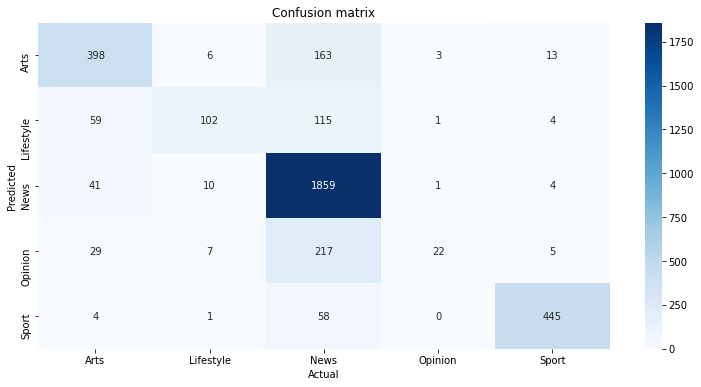

In [78]:
aux_df = data[['Category', 'Category1']].drop_duplicates().sort_values('Category1')
conf_matrix = confusion_matrix(labels_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
                cmap="Blues", fmt="d")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [112]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, features_test, labels_test, cv = 10)
print("Scores: ", scores)
print("Accuracy: ", round(scores.mean(), 2) * 100, "%")
print("Standard Deviation: +/-", scores.std())

Scores:  [0.77591036 0.78711485 0.75070028 0.767507   0.78711485 0.77871148
 0.74509804 0.78932584 0.77247191 0.74438202]
Accuracy:  77.0 %
Standard Deviation: +/- 0.0165259274345035


# Support Vector Machine

In [79]:
from sklearn import svm
svc = svm.SVC(random_state=8)
svc.fit(features_train, labels_train)
svc_pred = svc.predict(features_test)
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, svc.predict(features_train)))

The training accuracy is: 
0.9503715126875087


In [80]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, svc_pred))
ac1=accuracy_score(labels_test, svc_pred)
accuracies.append(ac1)

The test accuracy is: 
0.8525371460611157


In [81]:
#Classification report
print("Classification report")
print(classification_report(labels_test,svc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       583
           1       0.71      0.56      0.62       281
           2       0.87      0.94      0.90      1915
           3       0.73      0.54      0.62       280
           4       0.97      0.94      0.95       508

    accuracy                           0.85      3567
   macro avg       0.81      0.75      0.78      3567
weighted avg       0.85      0.85      0.85      3567



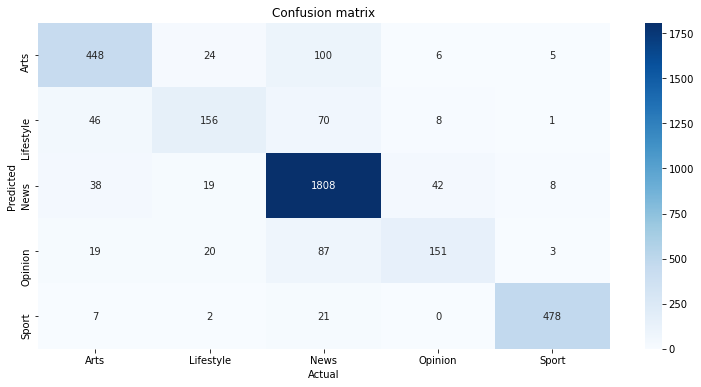

In [82]:
aux_df = data[['Category', 'Category1']].drop_duplicates().sort_values('Category1')
conf_matrix = confusion_matrix(labels_test, svc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues", fmt="d")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [115]:
scores = cross_val_score(svc, features_test, labels_test, cv = 10)
print("Scores: ", scores)
print("Accuracy: ", round(scores.mean(), 2) * 100, "%")
print("Standard Deviation: +/-", scores.std())

Scores:  [0.82913165 0.82913165 0.79831933 0.83193277 0.83193277 0.82352941
 0.80952381 0.84269663 0.83988764 0.79775281]
Accuracy:  82.0 %
Standard Deviation: +/- 0.015280391466783425


# KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(features_train, labels_train)
knn_pred = knn.predict(features_test)
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, knn.predict(features_train)))

The training accuracy is: 
0.8715126875087621


In [84]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, knn_pred))
ac2=accuracy_score(labels_test, knn_pred)
accuracies.append(ac2)

The test accuracy is: 
0.8062797869358004


In [85]:
#Classification report
print("Classification report")
print(classification_report(labels_test,knn_pred))

Classification report
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       583
           1       0.54      0.54      0.54       281
           2       0.85      0.91      0.88      1915
           3       0.60      0.19      0.29       280
           4       0.93      0.94      0.93       508

    accuracy                           0.81      3567
   macro avg       0.73      0.67      0.68      3567
weighted avg       0.79      0.81      0.79      3567



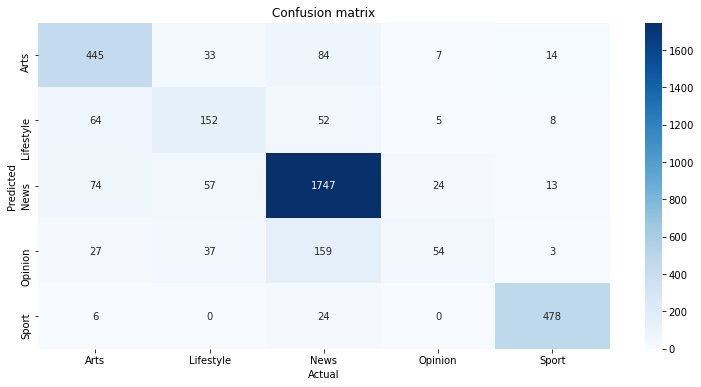

In [86]:
aux_df = data[['Category', 'Category1']].drop_duplicates().sort_values('Category1')
conf_matrix = confusion_matrix(labels_test, knn_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues", fmt="d")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [113]:
scores = cross_val_score(knn, features_test, labels_test, cv = 10)
print("Scores: ", scores)
print("Accuracy: ", round(scores.mean(), 2) * 100, "%")
print("Standard Deviation: +/-", scores.std())

Scores:  [0.80672269 0.78711485 0.79551821 0.80672269 0.81792717 0.76470588
 0.78431373 0.83988764 0.80617978 0.76404494]
Accuracy:  80.0 %
Standard Deviation: +/- 0.022224852515401437


# Gradient Boosting

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = 8)
gbc.fit(features_train, labels_train)
gbc_pred = gbc.predict(features_test)
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, gbc.predict(features_train)))

The training accuracy is: 
0.8867236786765736


In [88]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, gbc_pred))
ac3=accuracy_score(labels_test, gbc_pred)
accuracies.append(ac3)

The test accuracy is: 
0.8236613400616765


In [89]:
#Classification report
print("Classification report")
print(classification_report(labels_test,gbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       583
           1       0.67      0.44      0.53       281
           2       0.84      0.93      0.88      1915
           3       0.67      0.57      0.62       280
           4       0.94      0.91      0.93       508

    accuracy                           0.82      3567
   macro avg       0.78      0.71      0.74      3567
weighted avg       0.82      0.82      0.82      3567



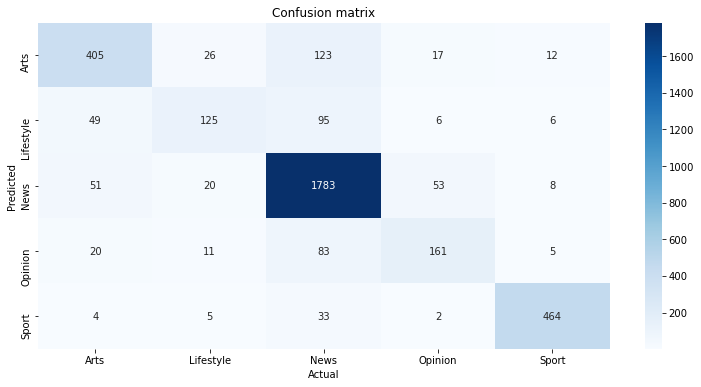

In [90]:
aux_df = data[['Category', 'Category1']].drop_duplicates().sort_values('Category1')
conf_matrix = confusion_matrix(labels_test, gbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues", fmt="d")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

# Comparision

In [137]:
compare = pd.DataFrame({'Algorithms' : models , 'Accuracy' : accuracies})
compare.sort_values(by='Accuracy' ,ascending=False)

,Algorithms,Accuracy
1,Support Vector Machine,0.852537
3,Gradient Boosting,0.823661
2,K-Nearest Neighbors,0.806280
0,Random Forest Classifier,0.792262


# knn

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit

In [121]:
# Create the parameter grid 
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 157.9min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                         51, 56, 61, 66, 71, 76, 81, 86, 91, 96,
                                         101, 106, 111, 116, 121, 127, 132, 137,
                                         142, 147, ...]},
             scoring='accuracy', verbose=1)

In [122]:

print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 11}

The mean accuracy of a model with these hyperparameters is:
0.8188190314358539


In [123]:

n_neighbors = [1,2,3,4,5,6,7,8,9,10,11]
param_grid = {'n_neighbors': n_neighbors}

knnc = KNeighborsClassifier()
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed: 28.2min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='accuracy', verbose=1)

In [124]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 9}

The mean accuracy of a model with these hyperparameters is:
0.8188190314358539


In [125]:
best_knnc = grid_search.best_estimator_

In [126]:
best_knnc

KNeighborsClassifier(n_neighbors=9)

In [127]:
best_knnc.fit(features_train, labels_train)

KNeighborsClassifier(n_neighbors=9)

In [128]:
knnc_pred = best_knnc.predict(features_test)


In [129]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_knnc.predict(features_train)))

The training accuracy is: 
0.8519556988644329


In [130]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, knnc_pred))

The test accuracy is: 
0.8135688253434259


In [131]:
# Classification report
print("Classification report")
print(classification_report(labels_test,knnc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       583
           1       0.59      0.55      0.57       281
           2       0.84      0.93      0.88      1915
           3       0.77      0.16      0.27       280
           4       0.94      0.93      0.94       508

    accuracy                           0.81      3567
   macro avg       0.77      0.67      0.68      3567
weighted avg       0.81      0.81      0.79      3567



# LSTM

https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17

In [92]:
from keras.preprocessing.text import Tokenizer
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
#to vectorize a text corpus, by turning each text into either a sequence of integers
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
#Updates internal vocabulary based on a list of texts.
tokenizer.fit_on_texts(data['Content'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 117745 unique tokens.


In [93]:
from keras.preprocessing.sequence import pad_sequences
#takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary
X = tokenizer.texts_to_sequences(data['Content'].values)
#transforms a list (of length num_samples) of sequences (lists of integers) into a 2D
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (17833, 250)


In [94]:
Y = pd.get_dummies(data['Category1']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (17833, 5)


In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(16049, 250) (16049, 5)
(1784, 250) (1784, 5)


In [96]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.layers import SpatialDropout1D
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
#SpatialDropout1D performs variational dropout in NLP models.
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/5
226/226 [==============================] - 208s 894ms/step - loss: 1.1435 - accuracy: 0.5941 - val_loss: 0.5239 - val_accuracy: 0.8305
Epoch 2/5
226/226 [==============================] - 174s 769ms/step - loss: 0.3871 - accuracy: 0.8774 - val_loss: 0.4684 - val_accuracy: 0.8573
Epoch 3/5
226/226 [==============================] - 188s 831ms/step - loss: 0.2933 - accuracy: 0.9211 - val_loss: 0.5154 - val_accuracy: 0.8779
Epoch 4/5
226/226 [==============================] - 180s 798ms/step - loss: 0.1129 - accuracy: 0.9700 - val_loss: 0.5092 - val_accuracy: 0.8748
Epoch 5/5
226/226 [==============================] - 188s 831ms/step - loss: 0.0509 - accuracy: 0.9876 - val_loss: 0.7016 - val_accuracy: 0.8336


In [97]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

56/56 [==============================] - 4s 74ms/step - loss: 0.7262 - accuracy: 0.8201
Test set
  Loss: 0.726
  Accuracy: 0.820


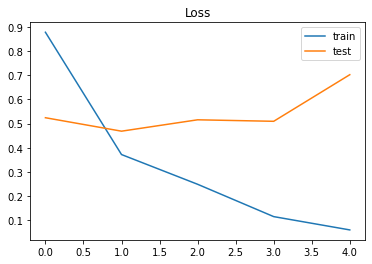

In [98]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

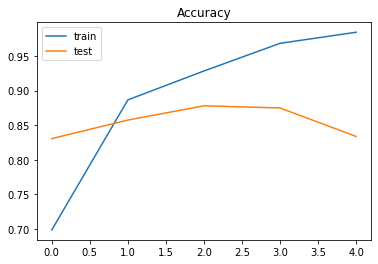

In [107]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

# Epoch=10

In [133]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.6f}\n  Accuracy: {:0.6f}'.format(accr[0],accr[1]))

Epoch 1/10
226/226 [==============================] - 236s 1s/step - loss: 1.1654 - accuracy: 0.5930 - val_loss: 0.5330 - val_accuracy: 0.8287
Epoch 2/10
226/226 [==============================] - 228s 1s/step - loss: 0.4290 - accuracy: 0.8684 - val_loss: 0.4950 - val_accuracy: 0.8561
Epoch 3/10
226/226 [==============================] - 202s 894ms/step - loss: 0.2368 - accuracy: 0.9321 - val_loss: 0.5474 - val_accuracy: 0.8555
Epoch 4/10
226/226 [==============================] - 205s 906ms/step - loss: 0.1084 - accuracy: 0.9726 - val_loss: 0.5297 - val_accuracy: 0.8592
Epoch 5/10
56/56 [==============================] - 5s 88ms/step - loss: 0.6622 - accuracy: 0.8470
Test set
  Loss: 0.662247
  Accuracy: 0.846973


In [136]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.6f}\n  Accuracy: {:0.6f}'.format(accr[0],accr[1]))

56/56 [==============================] - 5s 90ms/step - loss: 0.6622 - accuracy: 0.8470
Test set
  Loss: 0.662247
  Accuracy: 0.846973


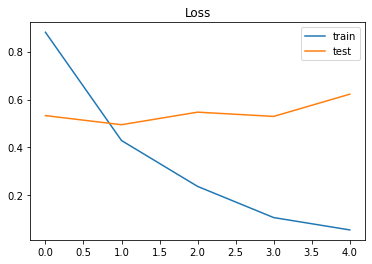

In [134]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

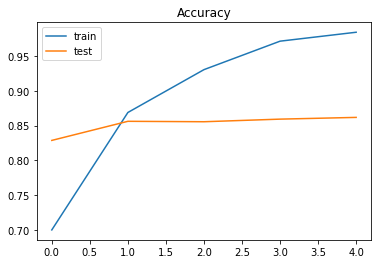

In [135]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();